In [1]:
from __future__ import absolute_import, division, print_function
from numpy import mean
from numpy import std
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestRegressor
import tensorflow as tf
from matplotlib import pyplot
import numpy as np
import pandas as pd

df = pd.read_csv("../Data/Simulated_Data_Train.csv")
train = pd.read_csv("../Data/Simulated_Data_Train.csv").dropna()
test = pd.read_csv("../Data/Simulated_Data_Test.csv").dropna()

c:\users\bryce\appdata\local\programs\python\python37\lib\site-packages\numpy\_distributor_init.py:32: UserWarning: loaded more than 1 DLL from .libs:
c:\users\bryce\appdata\local\programs\python\python37\lib\site-packages\numpy\.libs\libopenblas.PYQHXLVVQ7VESDPUVUADXEVJOBGHJPAY.gfortran-win_amd64.dll
c:\users\bryce\appdata\local\programs\python\python37\lib\site-packages\numpy\.libs\libopenblas.WCDJNK7YVMPZQ2ME2ZZHJJRJ3JIKNDB7.gfortran-win_amd64.dll
  stacklevel=1)


       tot_credit_debt  avg_card_debt    credit_age  credit_good_age  \
count     20000.000000   20000.000000  20000.000000     20000.000000   
mean      94563.702530   14088.235475    296.697000       149.771750   
std       23546.443862    9314.495936     61.711702        34.016476   
min        2367.430000    2363.120000     54.000000        21.000000   
25%       78743.750000   11321.502500    255.000000       127.000000   
50%       94670.630000   13243.750000    297.000000       150.000000   
75%      110329.335000   15196.060000    339.000000       172.000000   
max      188890.960000   99999.000000    545.000000       296.000000   

           card_age  non_mtg_acc_past_due_12_months_num  \
count  20000.000000                         20000.00000   
mean     268.015200                             0.11135   
std       59.364769                             0.43389   
min       41.000000                             0.00000   
25%      227.000000                             0.00000 

<AxesSubplot:>

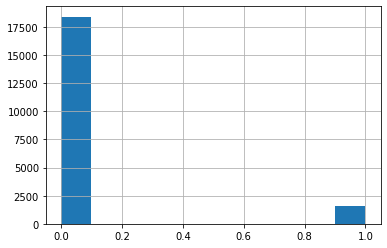

In [2]:
print(df.describe())
print(df.isnull().sum())
df["Default_ind"].hist()

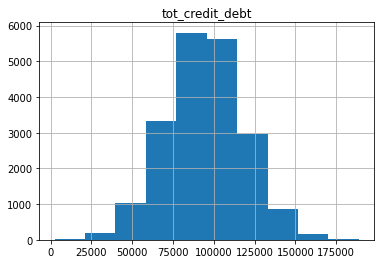

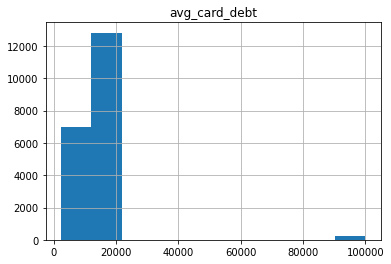

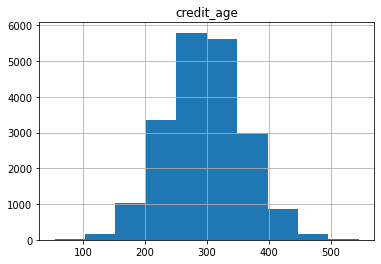

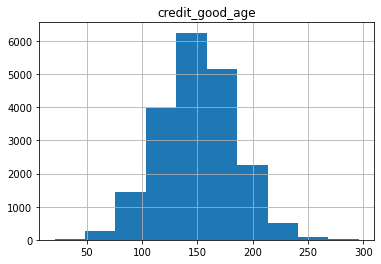

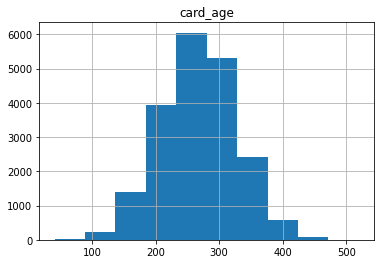

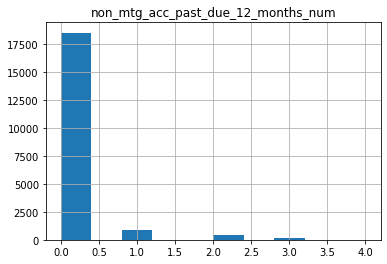

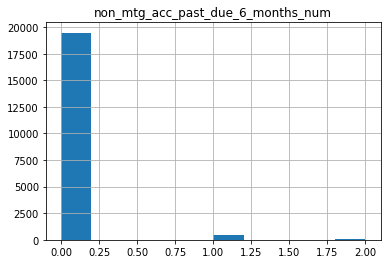

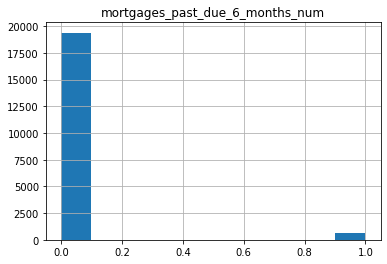

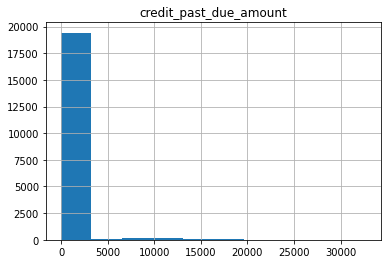

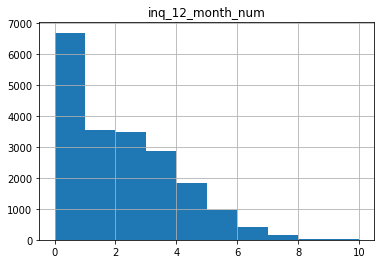

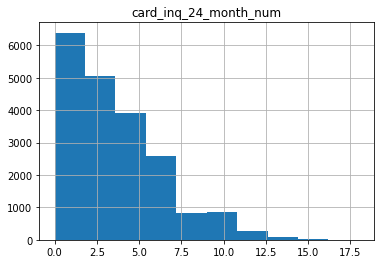

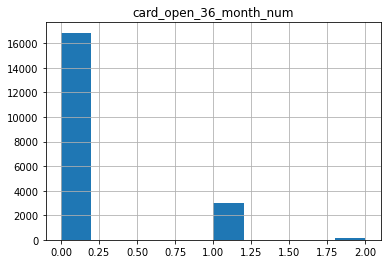

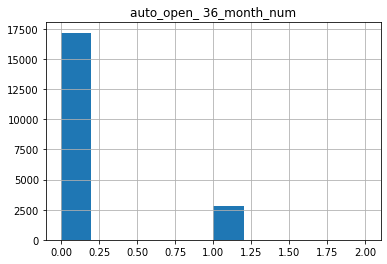

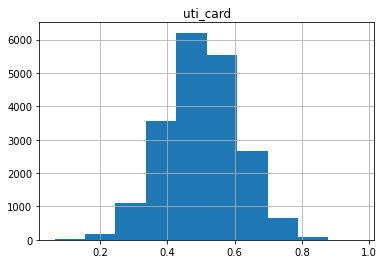

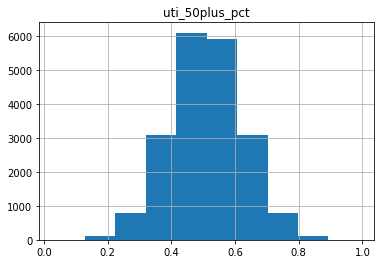

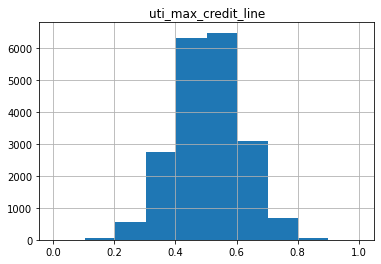

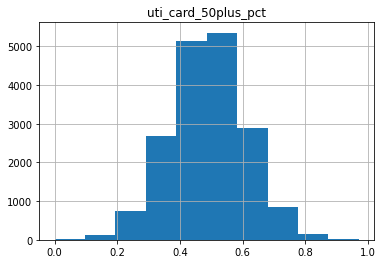

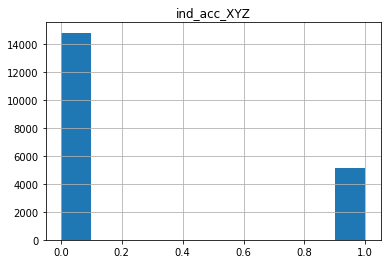

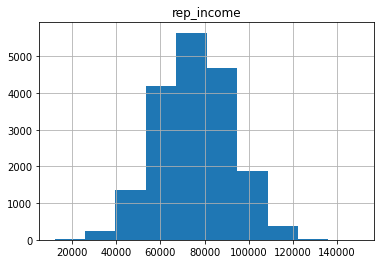

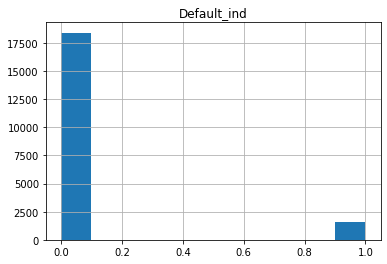

In [54]:
for col in df._get_numeric_data().columns:
    df.hist([col])

In [3]:
y_train = train["Default_ind"].astype(bool).to_numpy()
y_test = test["Default_ind"].astype(bool).to_numpy()
X_train = train.drop(columns=['Default_ind'])._get_numeric_data().to_numpy()
X_test = test.drop(columns=['Default_ind'])._get_numeric_data().to_numpy()

clf = LogisticRegression(random_state=0).fit(X_train, y_train)
clf.predict(X_test)
clf.score(X_train,y_train)

0.9313364333595023

In [5]:
model = GradientBoostingClassifier()
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
n_scores = cross_val_score(model, X_train, y_train, scoring='accuracy', cv=cv, n_jobs=-1)
print('Mean Accuracy: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))


Mean Accuracy: 0.937 (0.004)
hi


In [7]:
rf = RandomForestRegressor(n_estimators = 1000, random_state = 42)
rf.fit(X_train, y_train);
# Use the forest's predict method on the test data
predictions = rf.predict(X_test)
# Calculate the absolute errors
errors = abs(predictions - y_test)
# Print out the mean absolute error (mae)
print('Mean Absolute Error:', round(np.mean(errors), 2), 'degrees.')
print("hi")

Mean Absolute Error: 0.11 degrees.
hi


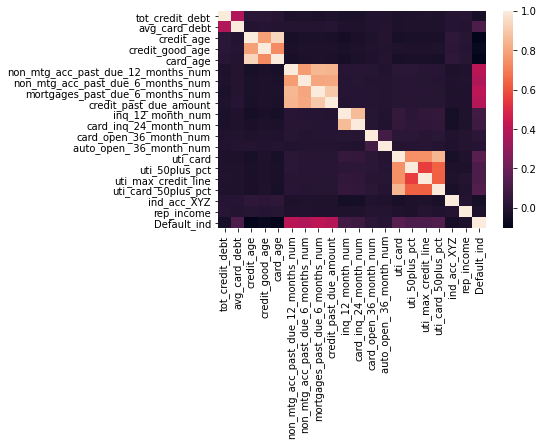

In [10]:
import seaborn as sns
from sklearn import preprocessing
mm_scaler = preprocessing.MinMaxScaler()
X_train_minmax = mm_scaler.fit_transform(X_train)
X_test = mm_scaler.transform(X_test)



corrMatrix = df.corr()

ax = sns.heatmap(corrMatrix)